In [1]:
# Import modules
# ipython magic to plot in line
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from astropy.io import ascii
import pytz
# OS interaction
import sys
import os

In [2]:
# Directories
# Path to raw data
file_in   = os.path.normpath(r'F:\Work\e\Data\Obs\Canada_Project_Sites\Nov_2014_snow_storm_data\QC_netcdf\CRHO.nc')

In [3]:
# Import stations of interest
CRHO_data = xr.open_dataset(file_in,engine='netcdf4')

AirMoistureContentA
IncrementalPrecipitationB
SoilHeatFluxA
SoilMoistureC
ScalarWindSpeedA
SoilTemperatureB
SoilTemperatureC
SoilTemperatureD
SoilTemperatureA
SnowDepthA
SnowDepthQCvalue
WindDirectionatA
IncrementalPrecipitationA
SnowWaterEquivelentA
DownwardSolarRadiation
UpwardTerrestrialRad
UpwardSolarRadiation
ScalarWindSpeedB
DownwardTerrestrialRad
SoilMoistureA
TotalPressureadjustedtosea-level


C:\Users\new356\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


SoilMoistureB
SoilMoistureD
NetRadiation
Albedo
AirtemperatureA
SoilTemperatureE
SoilMoistureE


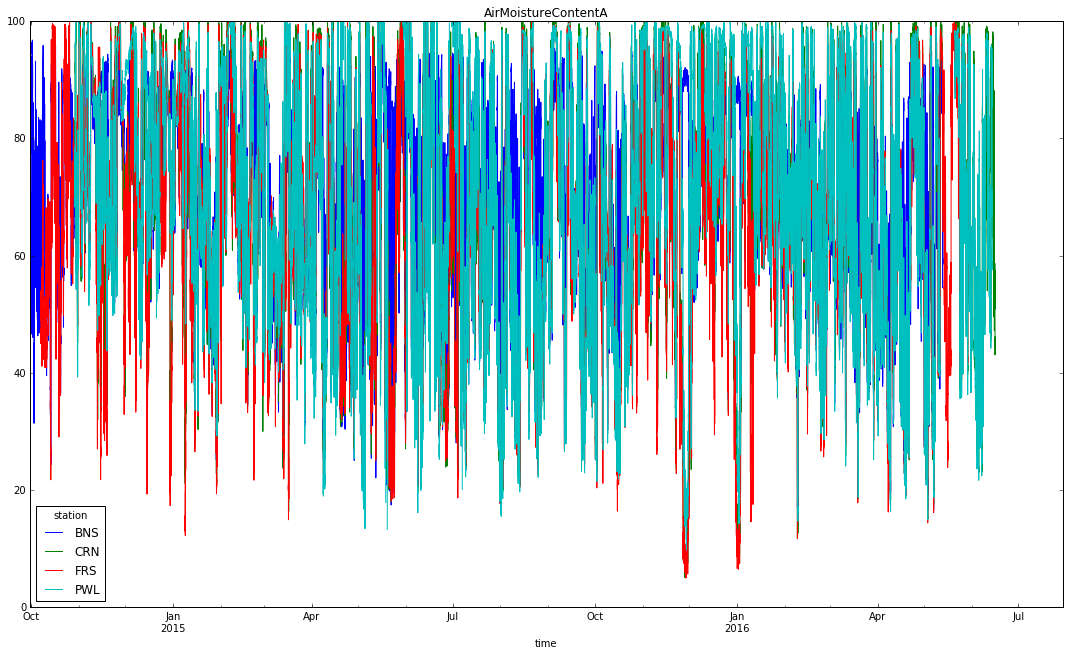

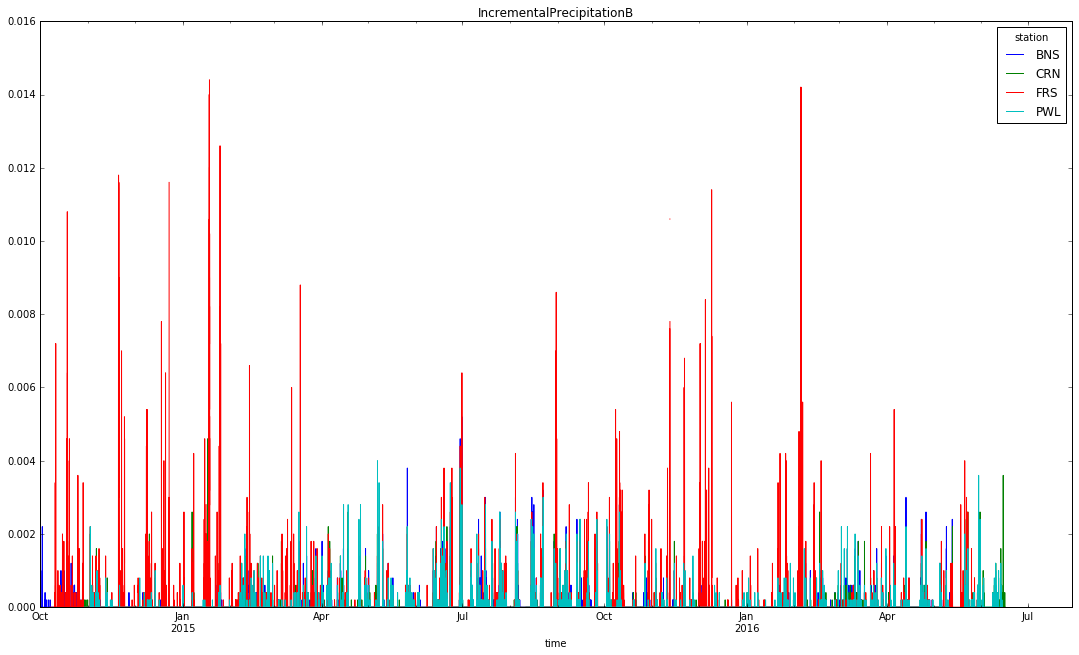

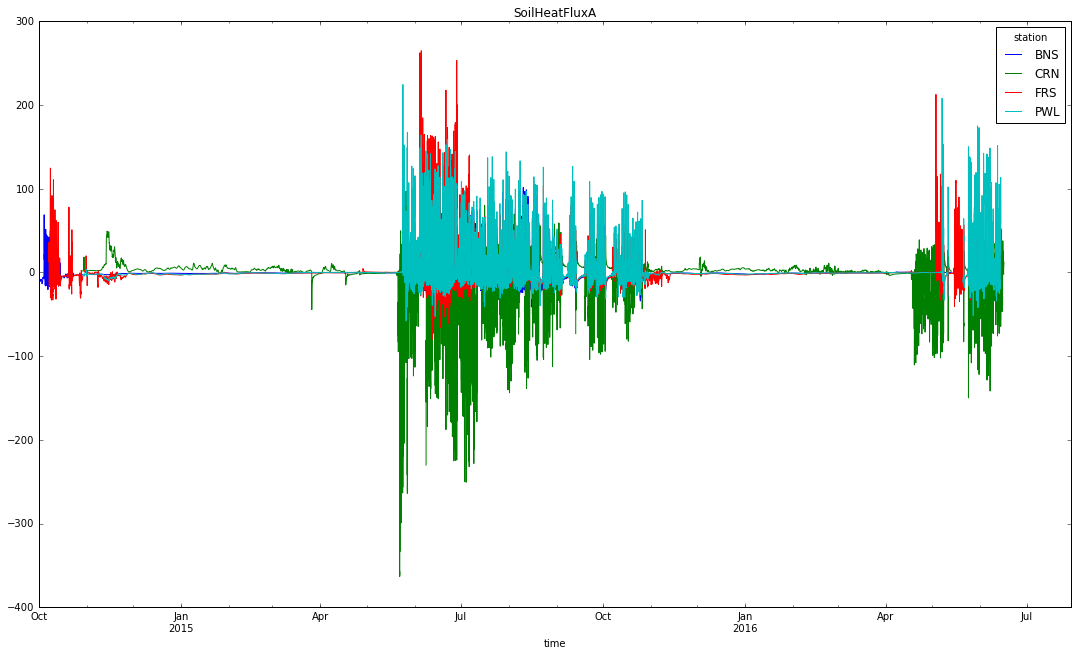

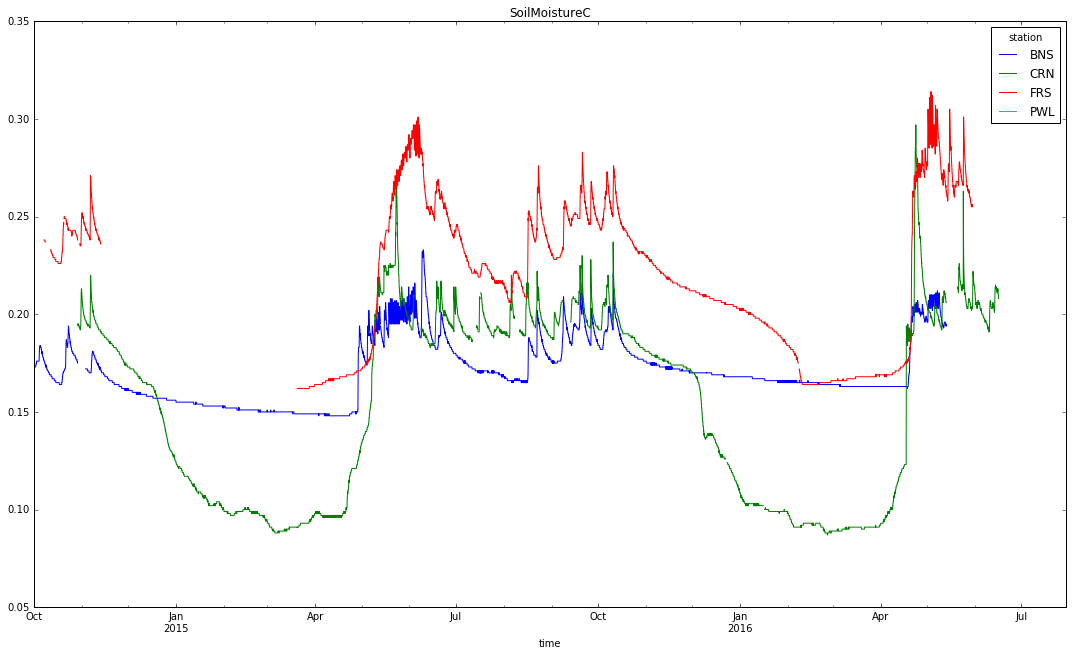

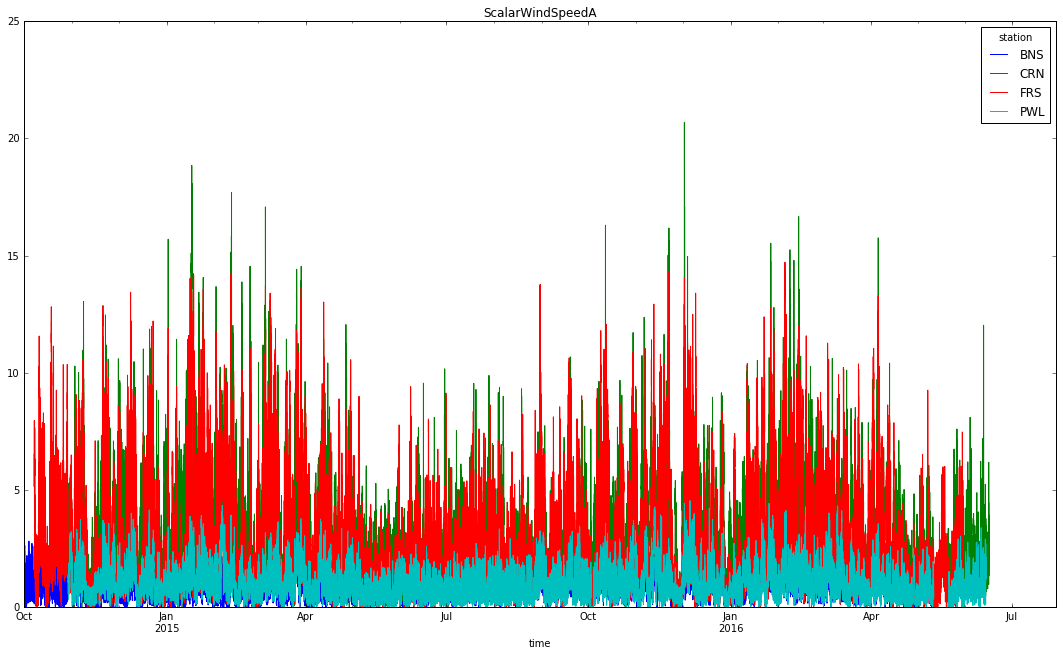

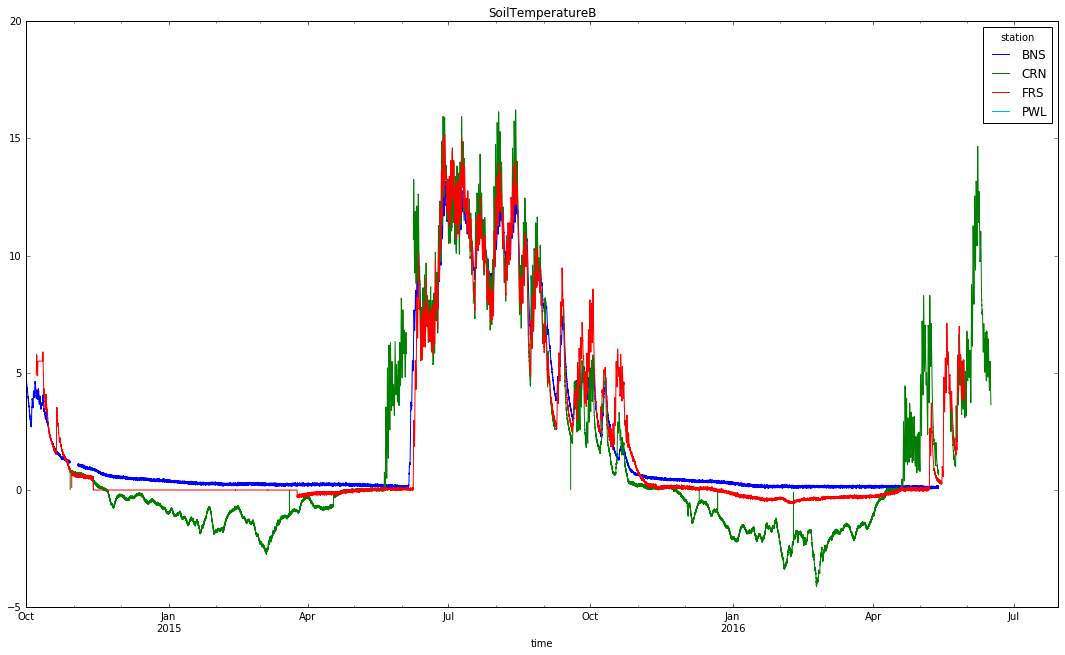

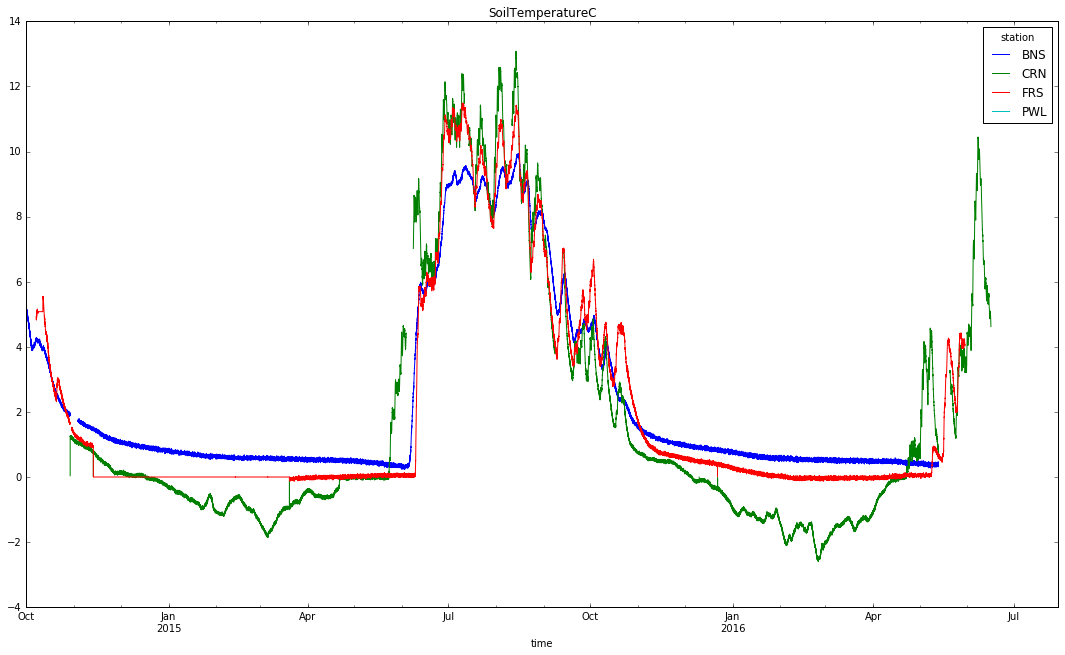

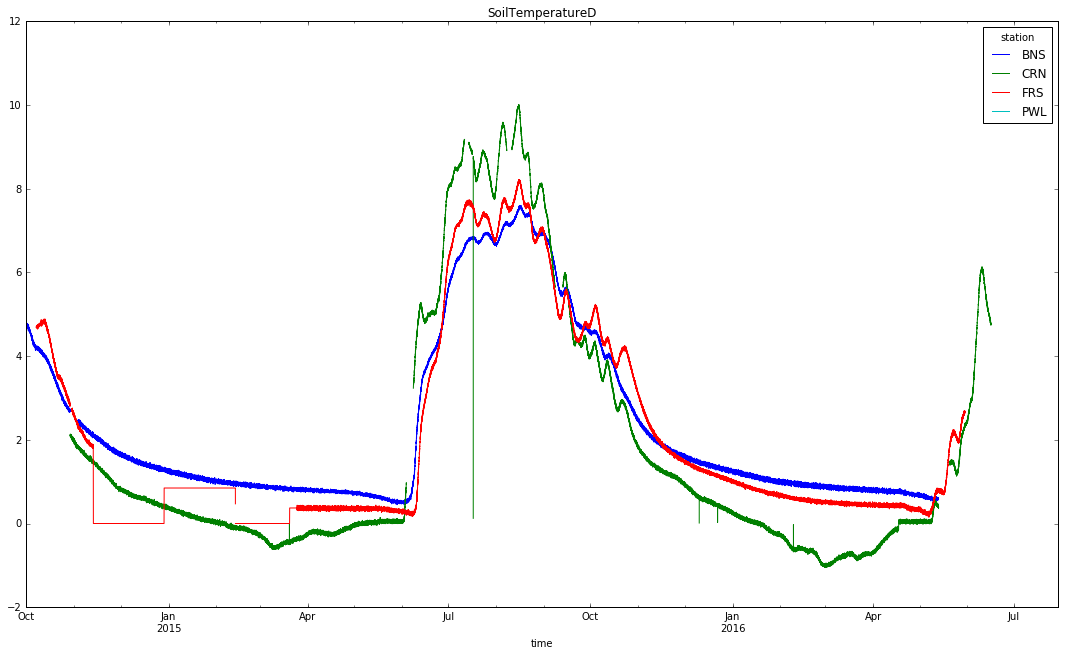

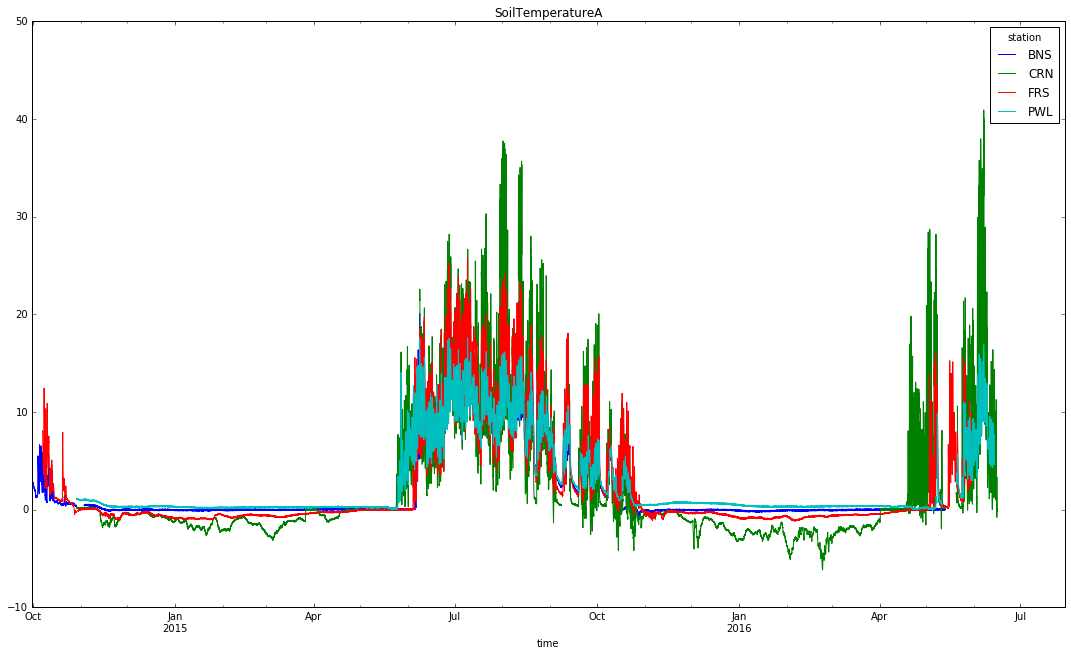

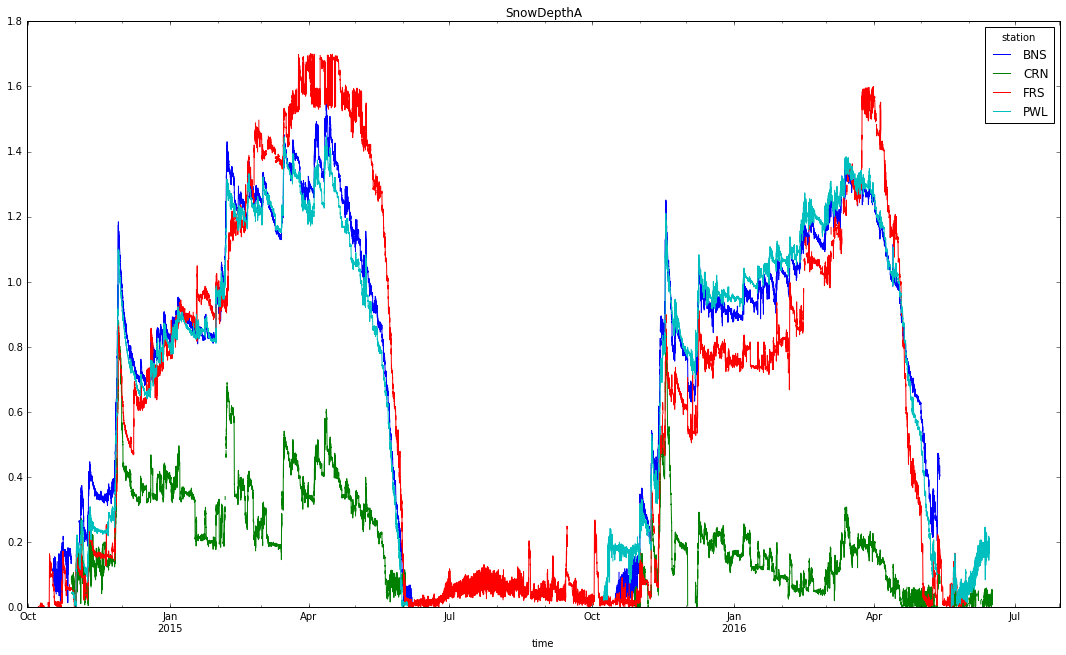

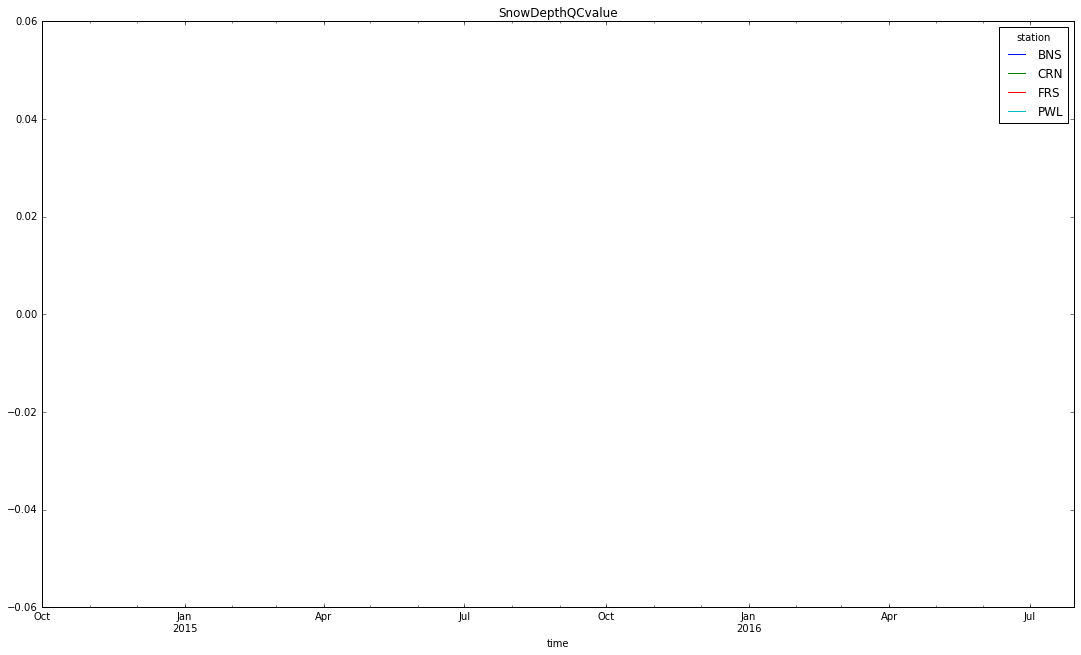

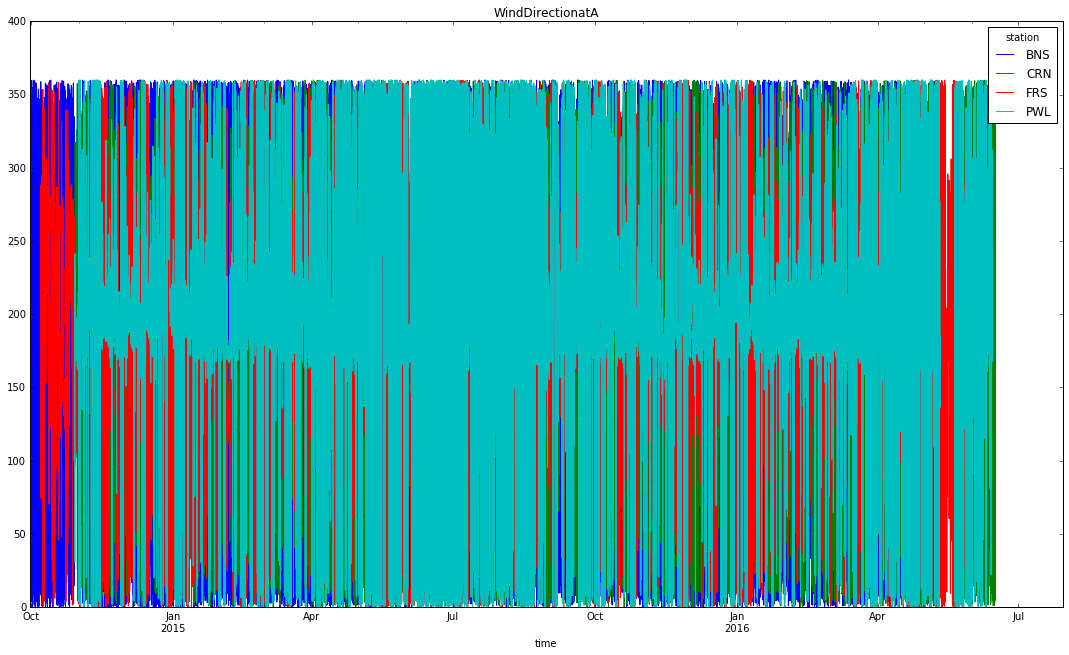

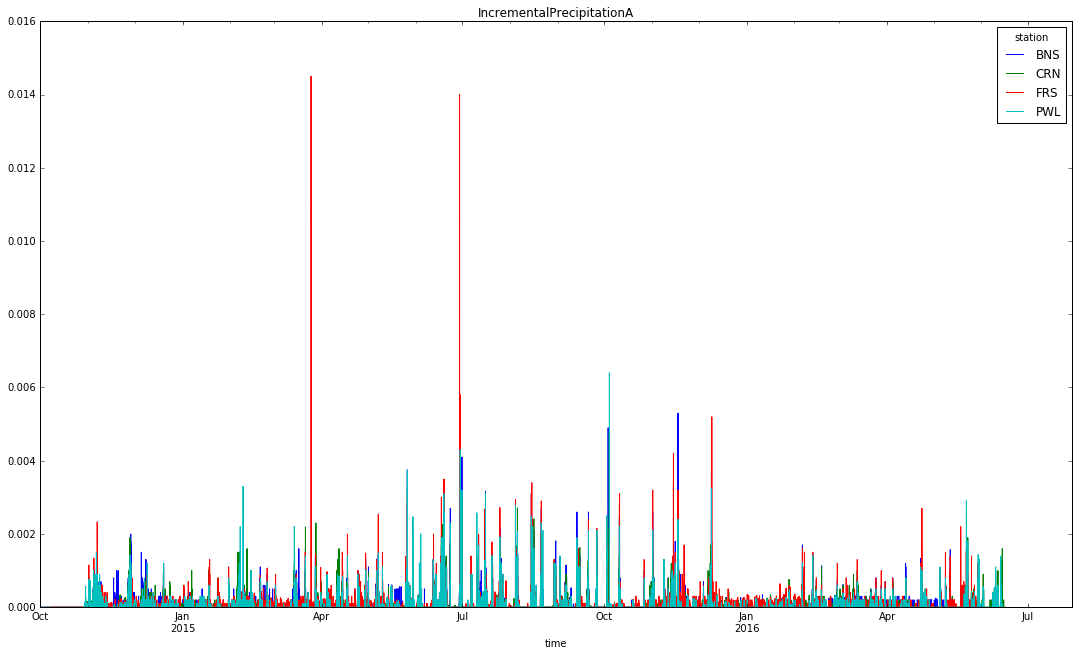

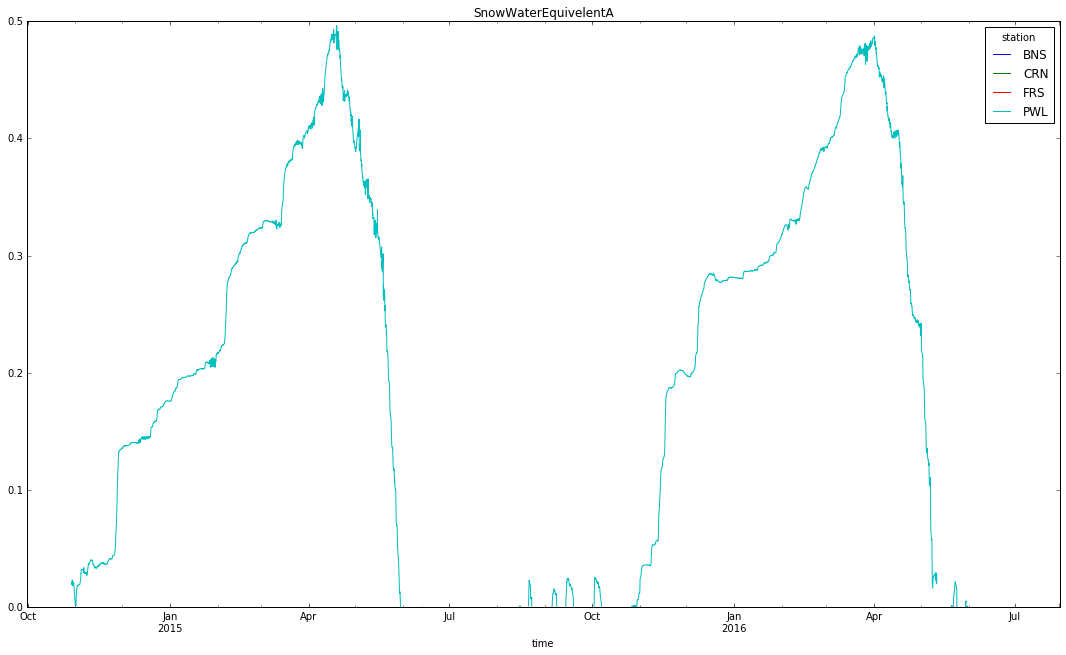

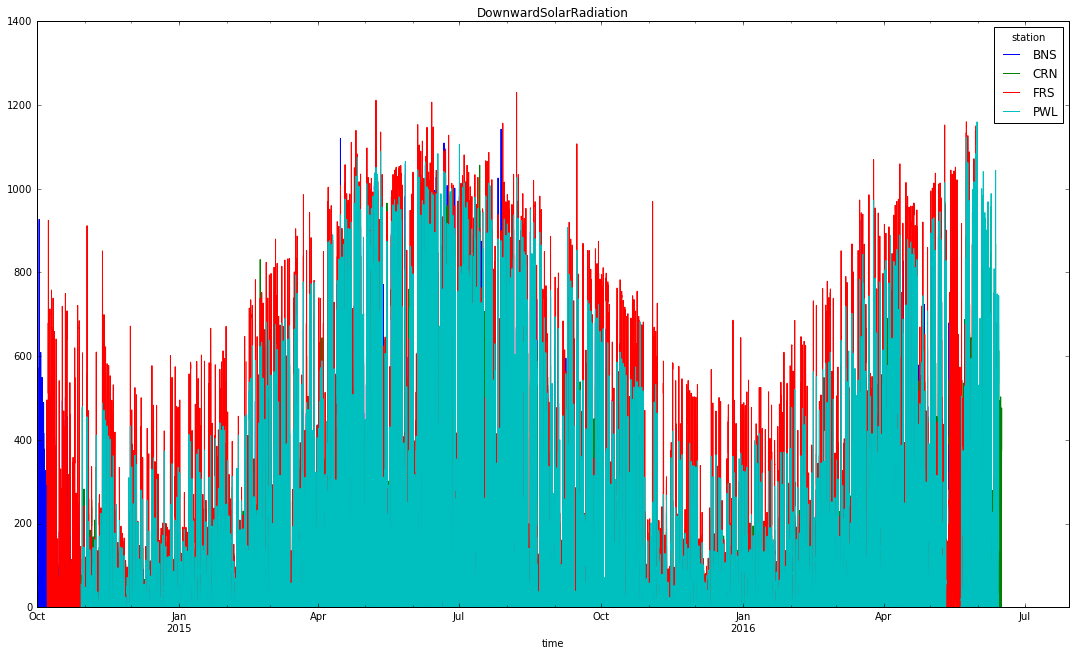

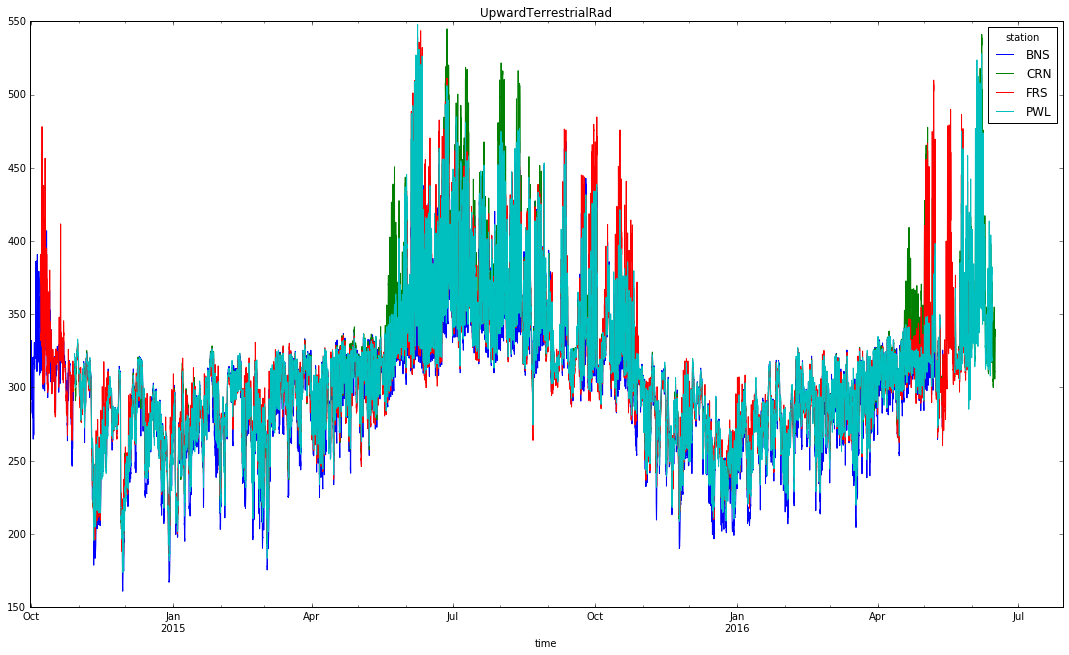

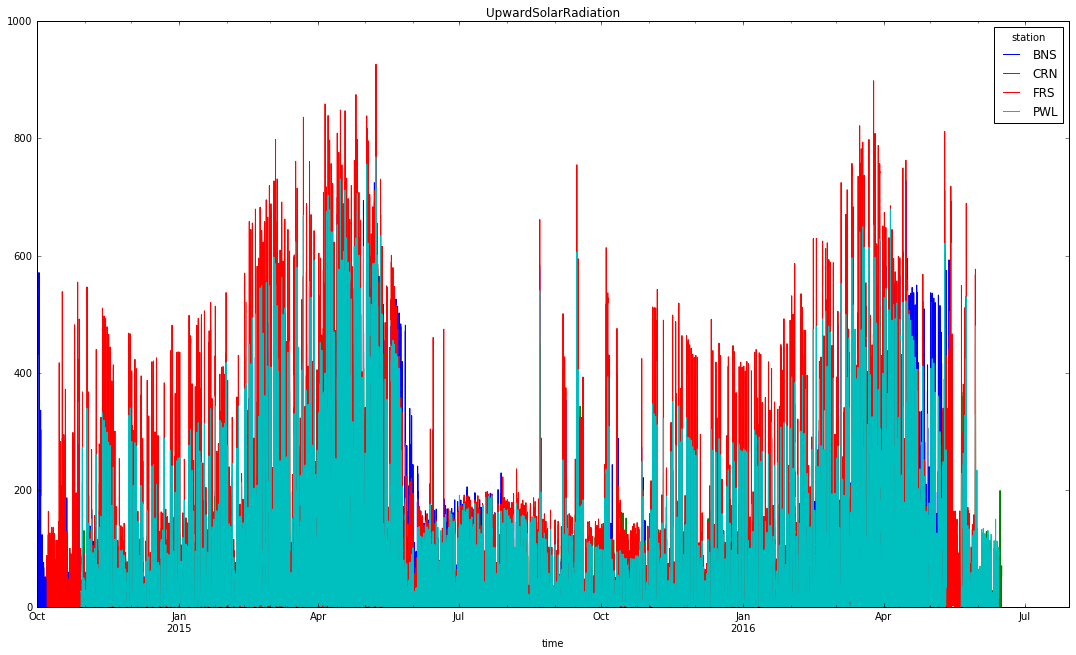

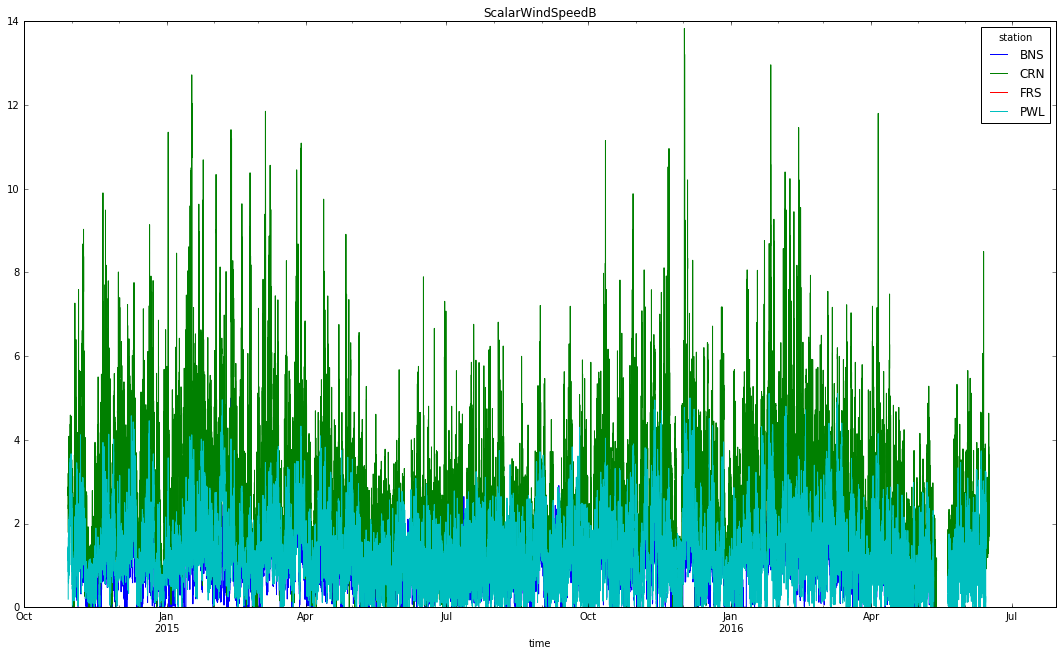

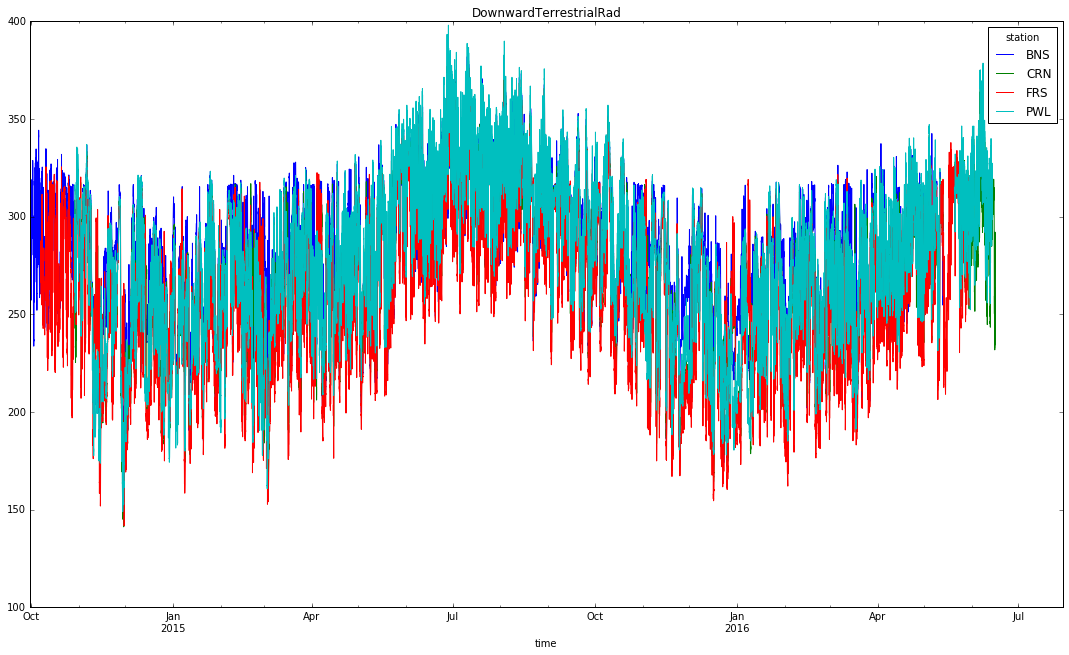

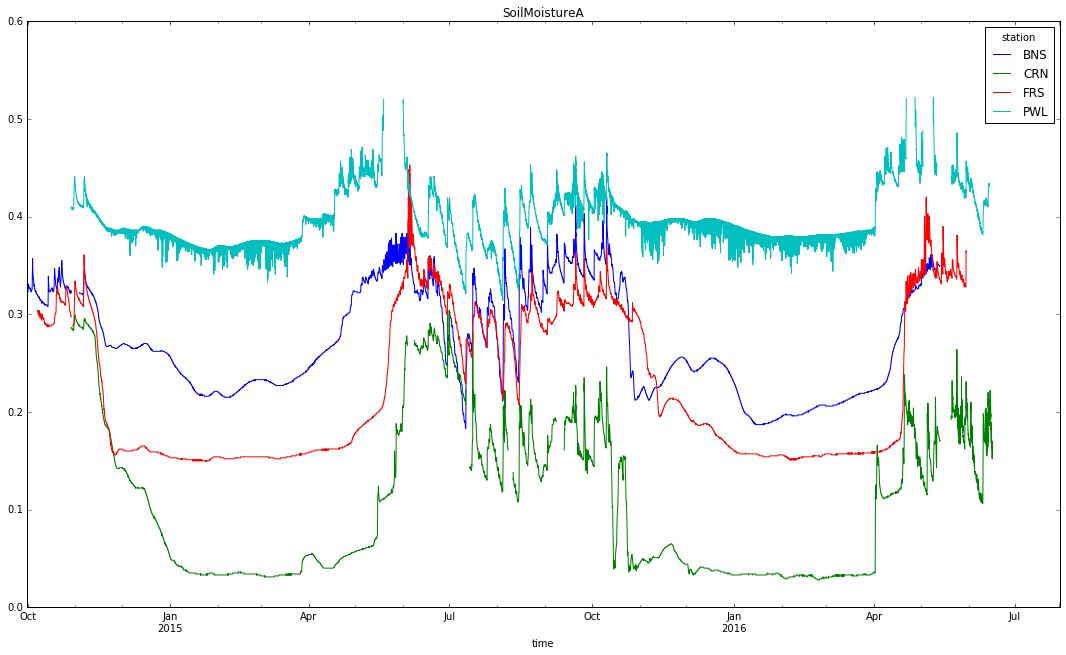

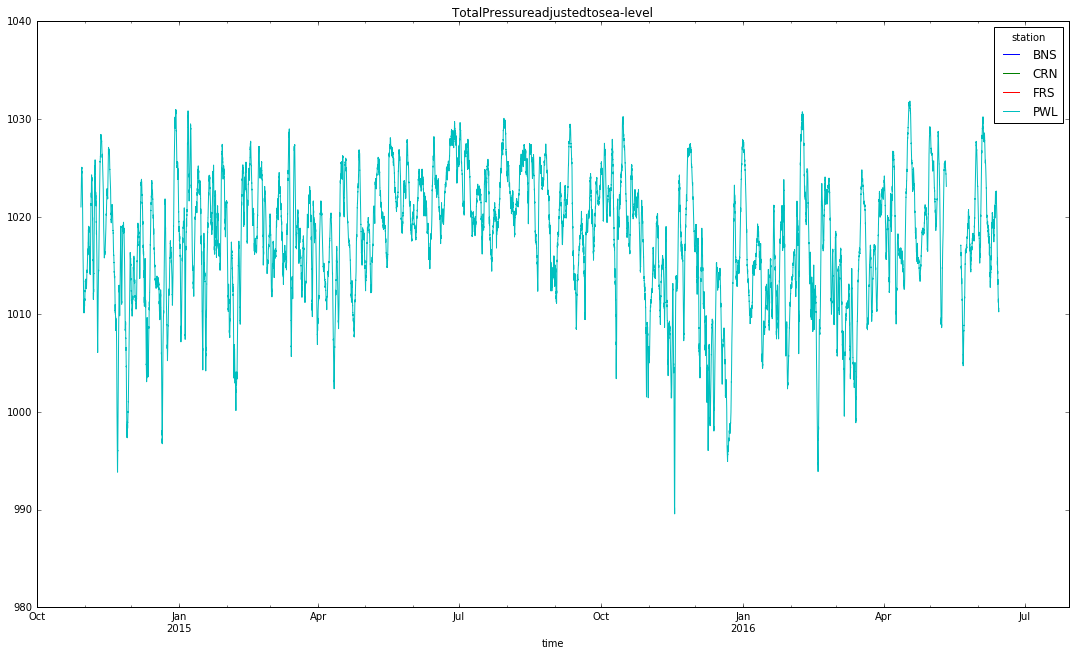

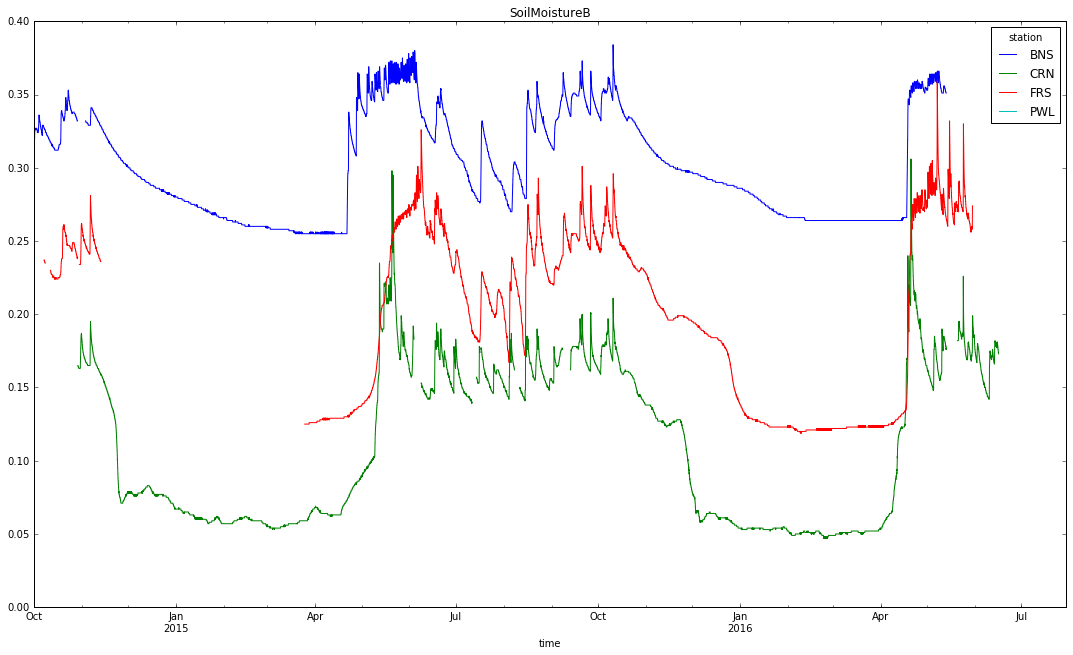

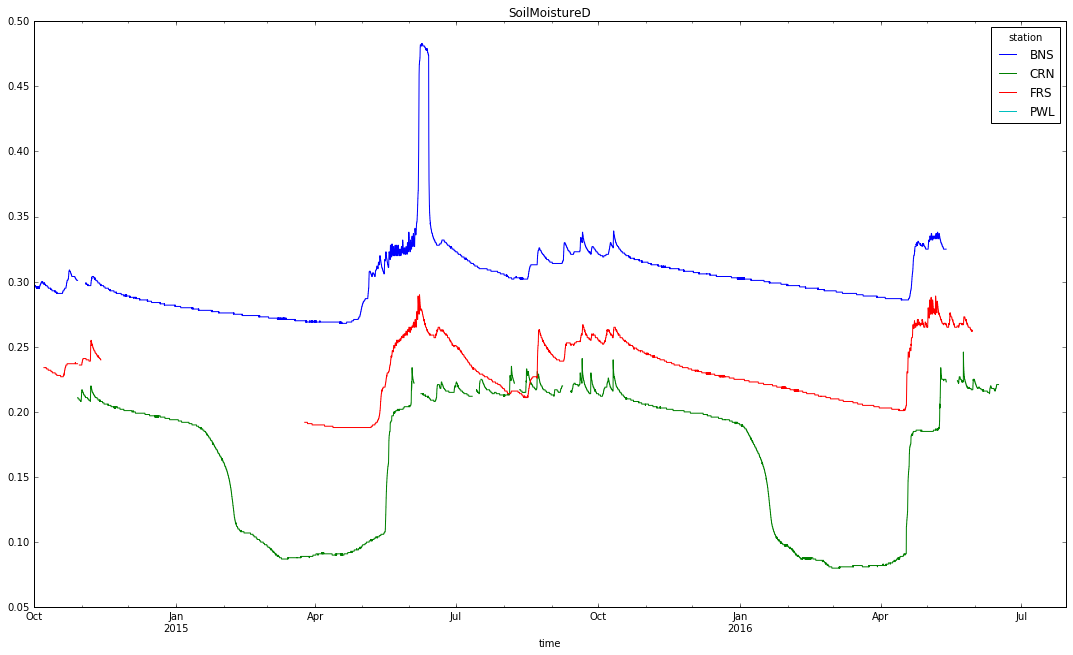

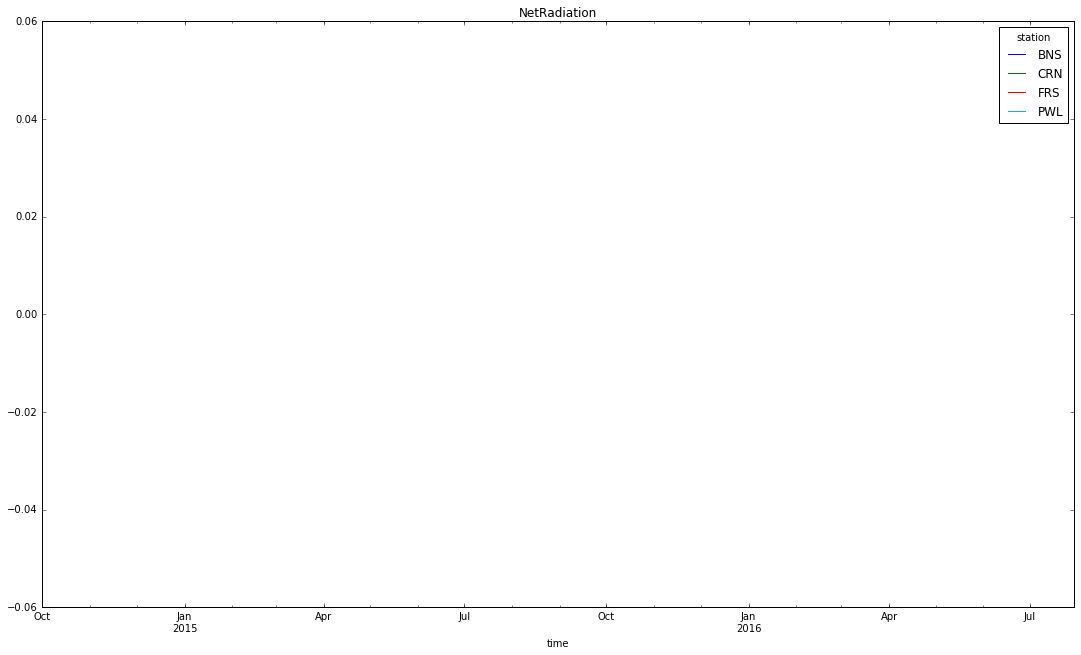

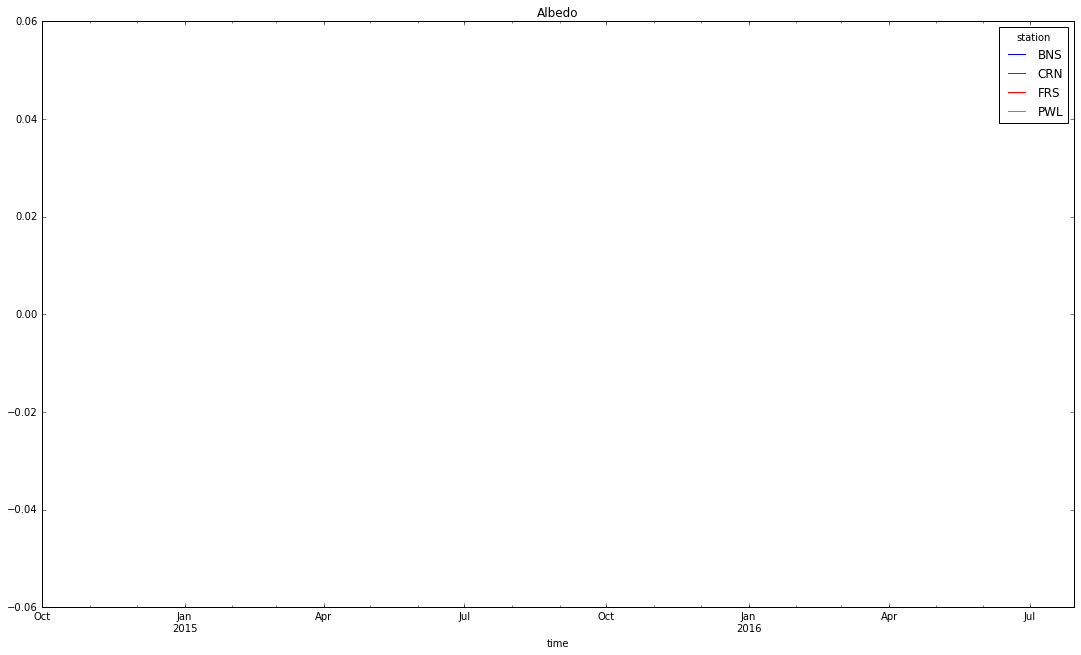

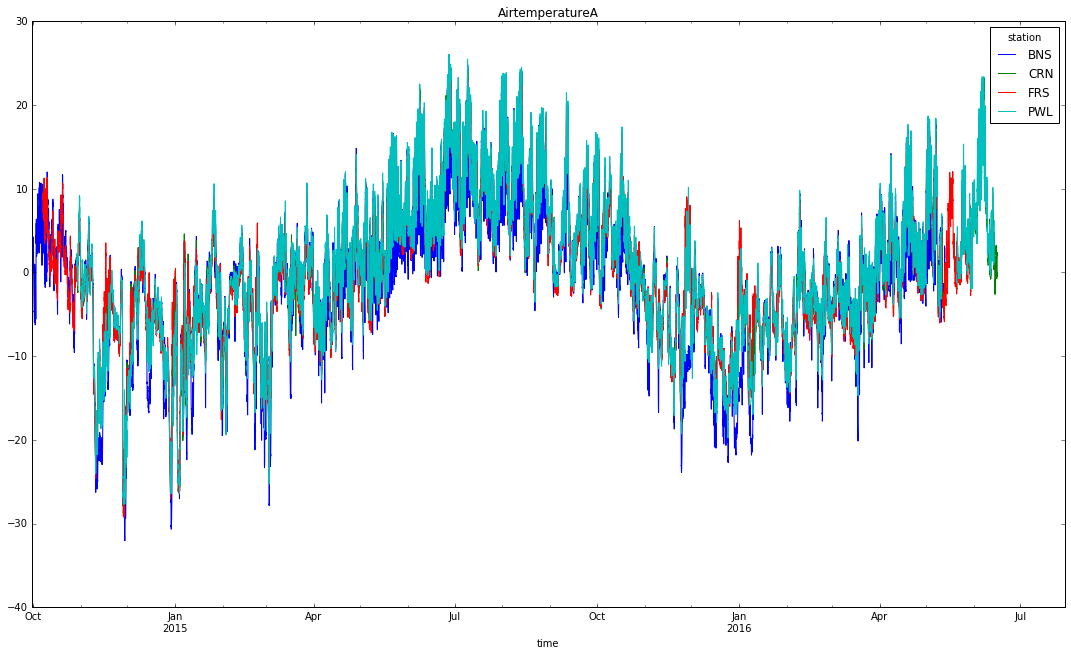

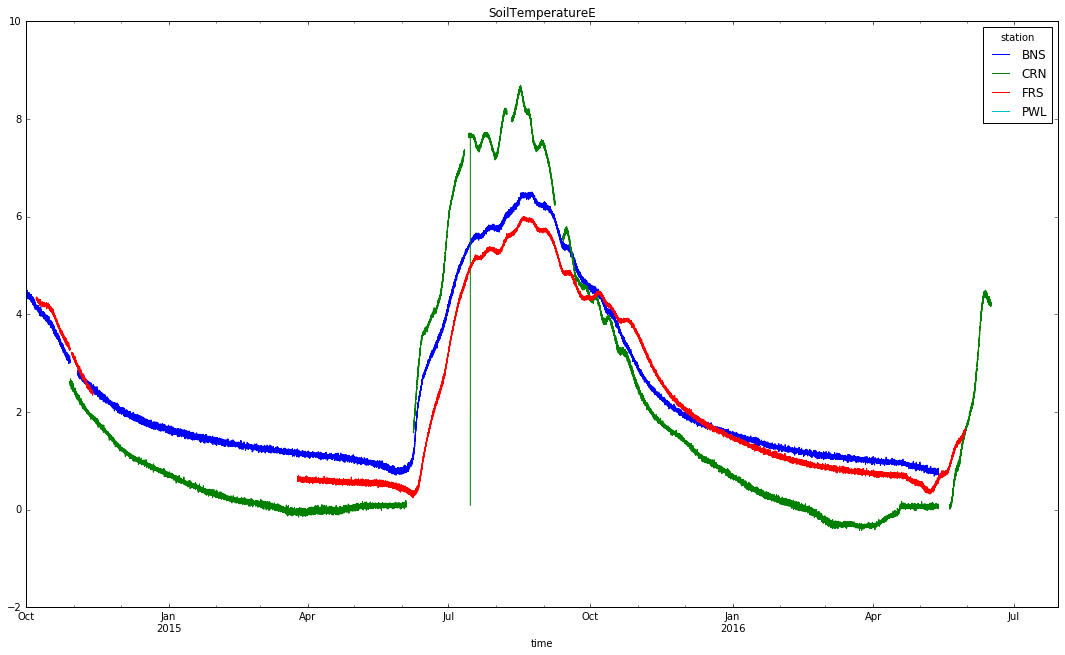

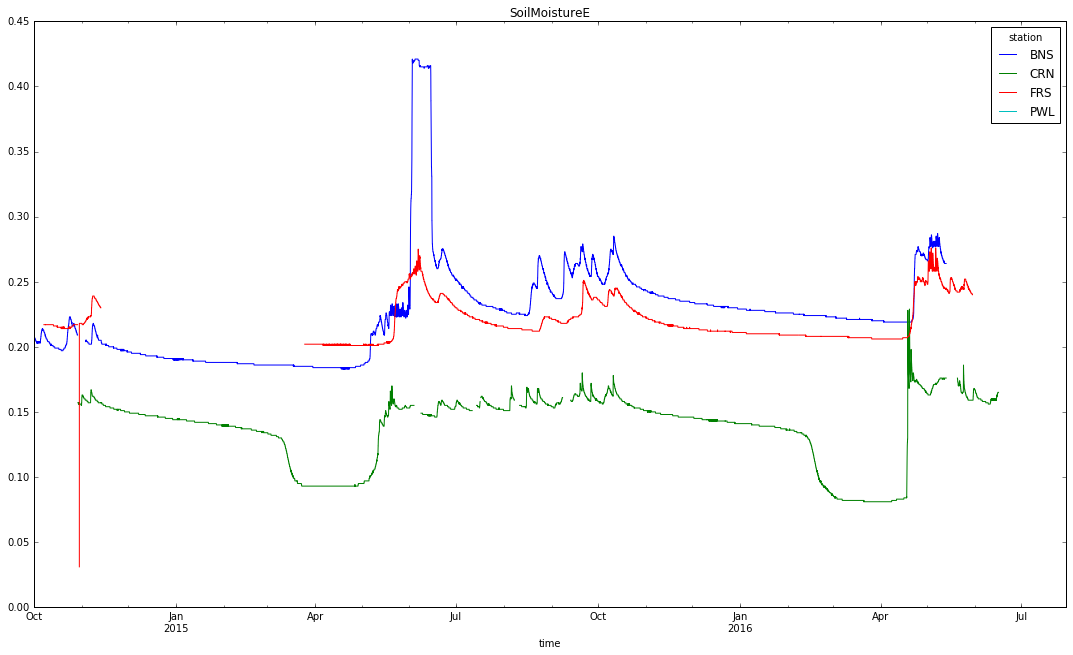

In [4]:
# Plot each variable (Takes a while, be patient)
for cvar in CRHO_data.data_vars:
    print(cvar)
    #ax1 = plt.figure(figsize=(16, 6))
    pd_temp = CRHO_data[cvar].to_dataframe()
    X = pd_temp.unstack().T
    X.index = X.index.droplevel()
    X.plot()
    plt.title(cvar)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5,forward=True)